In [1]:
import pandas as pd

In [2]:
draft_14 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2014_draft_class.csv")
draft_15 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2015_draft_class.csv")
draft_16 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2016_draft_class.csv")
draft_17 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2017_draft_class.csv")
draft_18 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2018_draft_class.csv")
draft_19 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2019_draft_class.csv")
draft_20 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2020_draft_class.csv")
draft_21 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2021_draft_class.csv")
draft_22 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2022_draft_class.csv")
draft_23 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2023_draft_class.csv")

In [3]:
rookies_eff = pd.concat([draft_14,draft_15,draft_16,draft_17,draft_18,draft_19,draft_20,draft_21,draft_22,draft_23])

In [4]:
rookies_eff.head()

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,...,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,Andrew Wiggins,1,CLE,2014,82.0,36.2,6.1,13.9,4.3,5.7,...,2.1,1.0,0.6,2.2,2.3,16.9,29.1,-1.5,2.8,11.5
1,Jabari Parker,2,MIL,2014,25.0,29.5,5.2,10.5,1.8,2.6,...,1.7,1.2,0.2,1.9,1.7,12.3,13.8,-0.8,2.5,12.6
2,Joel Embiid,3,PHI,2014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.5,7.0,31.4,NaN
3,Aaron Gordon,4,ORL,2014,47.0,17.0,2.0,4.4,0.9,1.3,...,0.7,0.4,0.5,0.8,1.8,5.2,42.6,0.3,11.3,9.5
4,Dante Exum,5,UTA,2014,82.0,22.2,1.8,5.1,0.2,0.4,...,2.4,0.5,0.2,1.4,1.8,4.8,5.9,-2.8,-1.2,4.0


In [7]:
# rookies_2017 = rookies_eff[rookies_eff['YEAR'] == 2017]
# rookies_2017

In [6]:
# rookies_eff.to_csv('rookie_eff.csv', index=False)

In [35]:
# brk = rookies_eff[rookies_eff['TEAM'] == 'BRK']
# brk

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,...,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
28,Chris McCullough,29,BRK,2015,24.0,15.1,1.8,4.5,0.5,1.0,...,0.4,1.2,0.5,0.6,1.6,4.7,0.6,-2.5,-0.1,10.7
40,Pat Connaughton,41,BRK,2015,34.0,4.2,0.4,1.4,0.1,0.1,...,0.3,0.1,0.0,0.3,0.2,1.1,23.4,-0.4,4.4,5.3
55,Marcus Paige,55,BRK,2016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-8.8,0.0,NaN
21,Jarrett Allen,22,BRK,2017,72.0,20.0,3.3,5.5,1.6,2.0,...,0.7,0.4,1.2,1.1,2.0,8.2,55.1,2.1,14.1,17.0
26,Kyle Kuzma,27,BRK,2017,77.0,31.2,6.1,13.5,1.9,2.7,...,1.8,0.6,0.4,1.8,2.1,16.1,15.3,-1.1,3.4,12.9
56,Sasha Vezenkov,57,BRK,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.9,0.1,NaN
29,Džanan Musa,29,BRK,2018,9.0,4.3,1.0,2.4,0.0,0.2,...,0.2,0.2,0.0,0.4,0.1,2.1,0.0,-4.6,-0.4,6.2
40,Rodions Kurucs,40,BRK,2018,63.0,20.5,3.2,7.1,1.1,1.5,...,0.8,0.7,0.4,1.2,2.3,8.5,2.3,-2.8,-0.4,10.6
46,Hamidou Diallo,45,BRK,2018,51.0,10.3,1.5,3.2,0.7,1.2,...,0.3,0.4,0.2,0.5,1.5,3.7,6.2,-2.1,-0.1,9.1
16,Nickeil Alexander-Walker,17,BRK,2019,47.0,12.6,2.1,5.7,0.5,0.8,...,1.9,0.4,0.2,1.1,1.2,5.7,6.0,-1.5,0.8,9.2


In [42]:
lottery = rookies_eff[rookies_eff['PICK'] <= 14]
# lottery.head(15)
lottery_counts = lottery['TEAM'].value_counts().reset_index()
lottery_counts = lottery_counts.rename(columns={'index':'TEAM','TEAM':'LOTTERY PICKS'})
lottery_counts
lottery_counts.to_csv('lottery_counts.csv', index=False)

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
drop_injuries = rookies_eff.dropna()
drop_injuries.head()

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,...,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,Andrew Wiggins,1,CLE,2014,82.0,36.2,6.1,13.9,4.3,5.7,...,2.1,1.0,0.6,2.2,2.3,16.9,29.1,-1.5,2.8,11.5
1,Jabari Parker,2,MIL,2014,25.0,29.5,5.2,10.5,1.8,2.6,...,1.7,1.2,0.2,1.9,1.7,12.3,13.8,-0.8,2.5,12.6
3,Aaron Gordon,4,ORL,2014,47.0,17.0,2.0,4.4,0.9,1.3,...,0.7,0.4,0.5,0.8,1.8,5.2,42.6,0.3,11.3,9.5
4,Dante Exum,5,UTA,2014,82.0,22.2,1.8,5.1,0.2,0.4,...,2.4,0.5,0.2,1.4,1.8,4.8,5.9,-2.8,-1.2,4.0
5,Marcus Smart,6,BOS,2014,67.0,27.0,2.6,7.1,1.2,1.9,...,3.1,1.5,0.3,1.3,2.6,7.8,33.4,-0.3,7.6,9.3


Text(0.5, 0, 'Player Efficiency Rating (PER)')

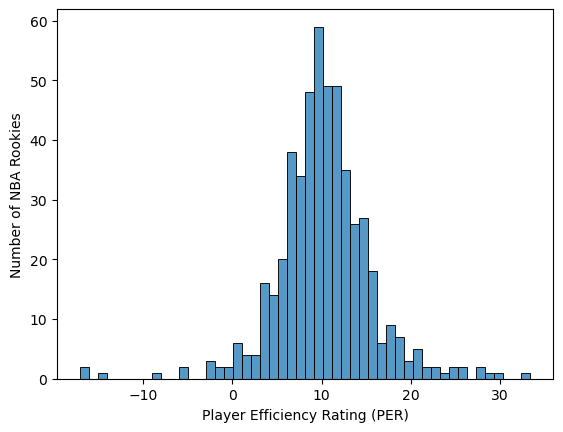

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=drop_injuries,x='PER', bins=50)
plt.ylabel('Number of NBA Rookies')
plt.xlabel('Player Efficiency Rating (PER)')

In [18]:
first = drop_injuries[drop_injuries['PICK'] <= 30]
second = drop_injuries[drop_injuries['PICK'] > 30]

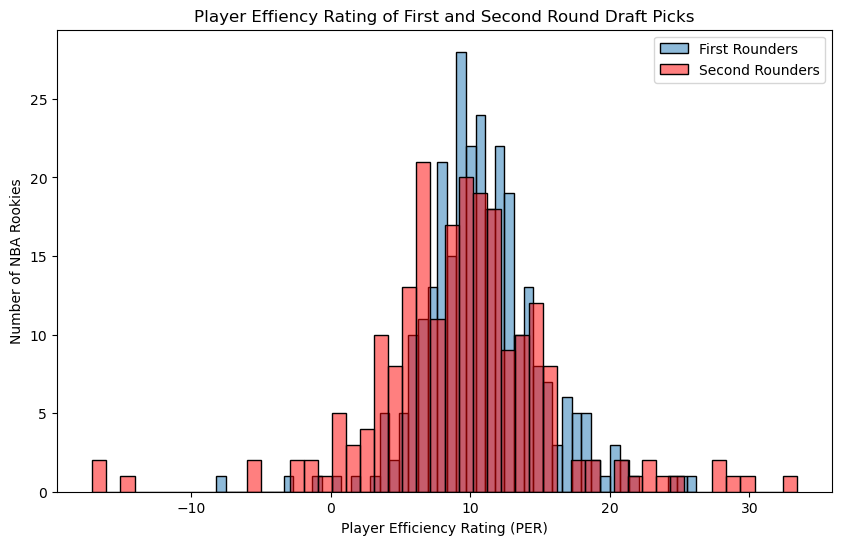

In [28]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the first histogram
sns.histplot(data=first, x='PER', bins=50, alpha=0.5, label='First Rounders')

# Plot the second histogram
sns.histplot(data=second, x = 'PER', bins=50, color='red', alpha=0.5, label='Second Rounders')

# Add labels and legend
plt.ylabel('Number of NBA Rookies')
plt.xlabel('Player Efficiency Rating (PER)')
plt.title('Player Effiency Rating of First and Second Round Draft Picks')
plt.legend()

# Show the plot
plt.show()

In [26]:
below_avg = rookies_eff[rookies_eff['PER'] < 15]
pct = round((len(below_avg)/len(rookies_eff))*100, 2)
print(pct)

72.18
